In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('/content/IMDb Movies India.csv.zip', encoding='latin1')
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [5]:
print(data.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [6]:
data.dropna(inplace=True)

In [9]:
label_encoders = {}


for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [11]:
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Year']]
y = data['Rating']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

# Convert 'Duration' column to numerical (minutes)
X_train['Duration'] = X_train['Duration'].str.replace(' min', '', regex=False).astype(int)
X_test['Duration'] = X_test['Duration'].str.replace(' min', '', regex=False).astype(int)

# Convert 'Year' column to numerical (extract year from string)
X_train['Year'] = X_train['Year'].str.extract(r'(\d{4})').astype(int)
X_test['Year'] = X_test['Year'].str.extract(r'(\d{4})').astype(int)

model = RandomForestRegressor(
n_estimators=100,
random_state=42
)


model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.9903242049469965
RMSE: 1.2624964482334673
R2 Score: 0.1392451729848102


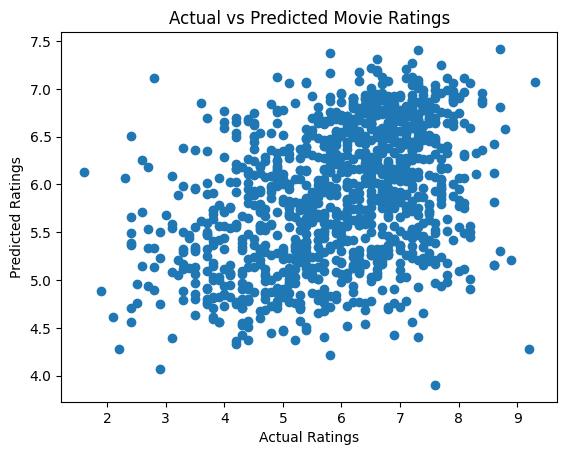

In [17]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()

In [31]:
new_movie = pd.DataFrame({
'Genre': [label_encoders['Genre'].transform(['Action'])[0]],
'Director': [label_encoders['Director'].transform(['Gaurav Bakshi'])[0]],
'Actor 1': [label_encoders['Actor 1'].transform(['Rasika Dugal'])[0]],
'Actor 2': [label_encoders['Actor 2'].transform(['Vivek Ghamande'])[0]], # Placeholder for Actor 2
'Actor 3': [label_encoders['Actor 3'].transform(['Arvind Jangid'])[0]], # Placeholder for Actor 3
'Duration': [150],
'Year': [2024]
})


predicted_rating = model.predict(new_movie)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 6.030999999999999
